In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Embeded Datasets
from sklearn import datasets

## Preprocessing
from sklearn.model_selection  import cross_val_score ,cross_val_predict

## Metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Algorithm
from sklearn.linear_model import SGDClassifier


In [2]:
## Load the MNIST Dataset 
mnsit_dataset  = datasets.fetch_openml('mnist_784' ,version=1 ,parser='auto')

In [3]:
mnsit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnsit_dataset= pd.DataFrame(np.c_[mnsit_dataset['data'],mnsit_dataset['target']],
                   columns=mnsit_dataset['feature_names']+['target'])
mnsit_dataset


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [5]:
mnsit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: object(785)
memory usage: 419.2+ MB


In [6]:
mnsit_dataset = mnsit_dataset.astype(np.int32)
mnsit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: int32(785)
memory usage: 209.6 MB


## Exploratory Data Analysis (EDA)

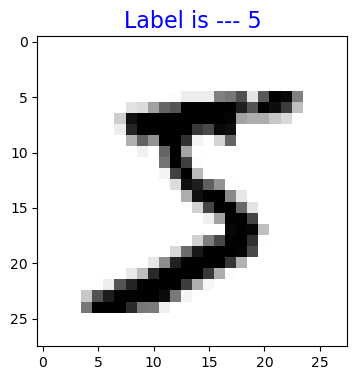

In [7]:
## first instance  --> take only the Features not the target
first_img  = mnsit_dataset.iloc[0, :]
first_img_feat  = first_img[:-1].values.reshape(28, 28)
first_img_label = first_img[-1]  

### Plotting the image
plt.figure(figsize =(4,6))
plt.imshow(first_img_feat ,cmap='binary')
plt.title(f'Label is --- {first_img_label}', fontsize=16, color='b')
plt.show()

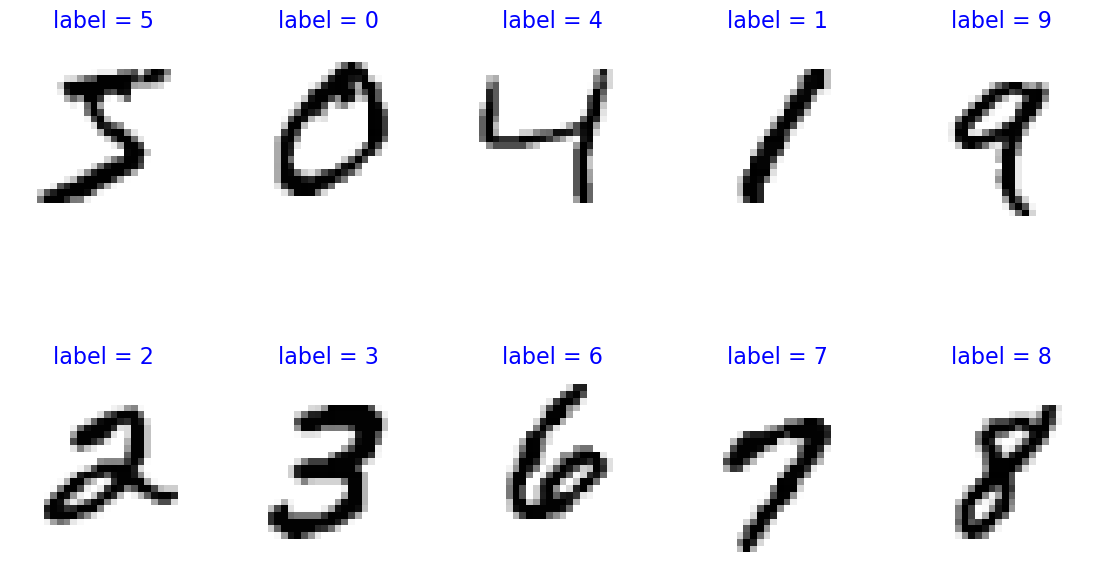

In [8]:
## We want to get an instance for each unique target and plot it
## Read the code carefully --> trace it line by line, point by point
target_values  = mnsit_dataset['target'].unique()

img_key_value = {}    ## to append in it
for key in target_values:
    img_key_value[key] = mnsit_dataset[mnsit_dataset['target']==target_values[key]].iloc[0][:-1].values.reshape(28, 28)
    

#img_key = list(img_key_value.keys())
img_key_label=list(img_key_value.keys())

## Plotting
fig, ax = plt.subplots(2, 5, figsize=(14, 8))   ## 10 values

x = 0
for row in range(2):
    for col in range(5):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_key_label[x]}', fontsize=16, color='b')   ## label 
        plt.imshow(img_key_value[x], cmap='binary')  ## image itself
        plt.axis('off')
        x+=1       

## Preprocessing

In [9]:
## Split to Features and traget
X =mnsit_dataset.drop(columns=['target'] ,axis =1)
y =mnsit_dataset['target']

In [10]:
## No Imputing, No encoding
max_value = max(X.max())
max_value

255

In [11]:
## Standardize by dividing by 255 to be range (0 - 1) instead of (0 - 255)
## I will divide first then split the dataset to train, test

X = X / 255.

# Split the Dataset

In [12]:
## First 60000 to train, and the other to test
X_train, X_test, y_train, y_test =X[:60000], X[60000:], y[:60000], y[60000:]  


## Firstly, Binary Classification

In [13]:
## Binary classification (True or 1 --> for target is 4) & (False or 0 --> for other target)
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

## Build the Model
### SGDClassifier

In [14]:
sgd_clf = SGDClassifier(penalty=None, random_state=42)
sgd_clf.fit(X_train ,y_train_4)

SGDClassifier(penalty=None, random_state=42)

In [15]:
## Validation --> Using Cross validation
sgd_acc_scores_valid = cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_4, cv=5, scoring='accuracy', n_jobs=-1)


## Get the Mean and std
print('Mean of Accuracy Scores using SGD -- ', sgd_acc_scores_valid.mean())
print('Std of Accuracy Scores using SGD -- ', sgd_acc_scores_valid.std())

Mean of Accuracy Scores using SGD --  0.9788833333333333
Std of Accuracy Scores using SGD --  0.0018299969641747806


## Other Metrics

In [16]:
## Predict for validation
y_pred_sgd_valid  = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_4, cv=5, n_jobs=-1,method='predict')

confmat_sgd =>
 [[53517   641]
 [  626  5216]]
************************************************************


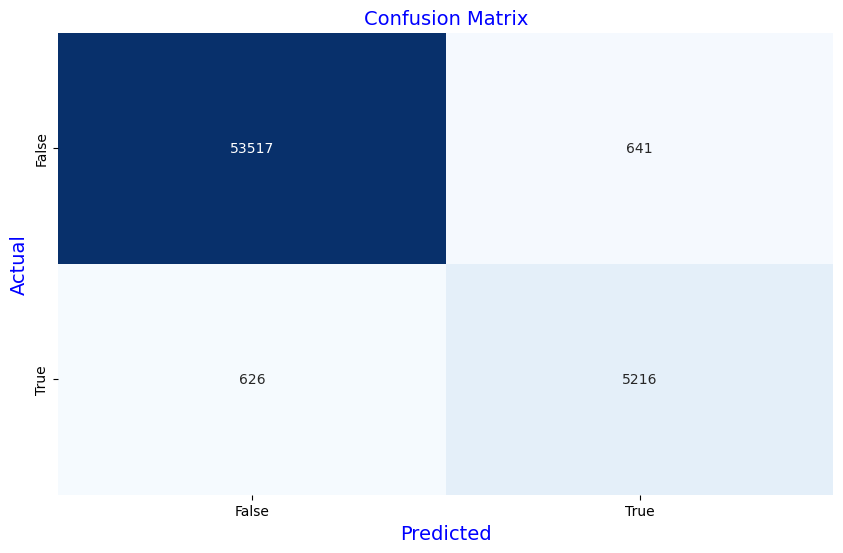

In [17]:
## confusion Matrix
confmat_sgd  = confusion_matrix(y_train_4 , y_pred_sgd_valid)
print('confmat_sgd =>\n', confmat_sgd)
print('**'*30)

## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()


In [18]:
## Precision and Recall score
precison_score_sgd = precision_score(y_train_4 , y_pred_sgd_valid)
print('Precison Score using SGD =>', precison_score_sgd)

recall_score_sgd = recall_score(y_train_4, y_pred_sgd_valid)
print('Recall Score using SGD =>', recall_score_sgd)

print('---'*20)

class_repo_sgd = classification_report(y_train_4, y_pred_sgd_valid)
print('Classifcation Report using SGD => \n', class_repo_sgd)

Precison Score using SGD => 0.8905583063001536
Recall Score using SGD => 0.8928449161246148
------------------------------------------------------------
Classifcation Report using SGD => 
               precision    recall  f1-score   support

       False       0.99      0.99      0.99     54158
        True       0.89      0.89      0.89      5842

    accuracy                           0.98     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.98      0.98      0.98     60000



In [19]:
## to get f1_score
f1_score_sgd = f1_score(y_train_4, y_pred_sgd_valid)
print('F1 Score using SGD =>', f1_score_sgd)

F1 Score using SGD => 0.891700145311565


In [20]:
## Precision/Recall Tradeoff
## Using the (decision_function) provided in sklearn
y_scores_sgd = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_4, cv=5, n_jobs=-1, method='decision_function')

In [21]:
## Using these scores to get precision and recall at different thresholds
precision_vals, recall_vals, thresholds_vals = precision_recall_curve(y_train_4, y_scores_sgd)

## Precision & Recall & thresholds Curve

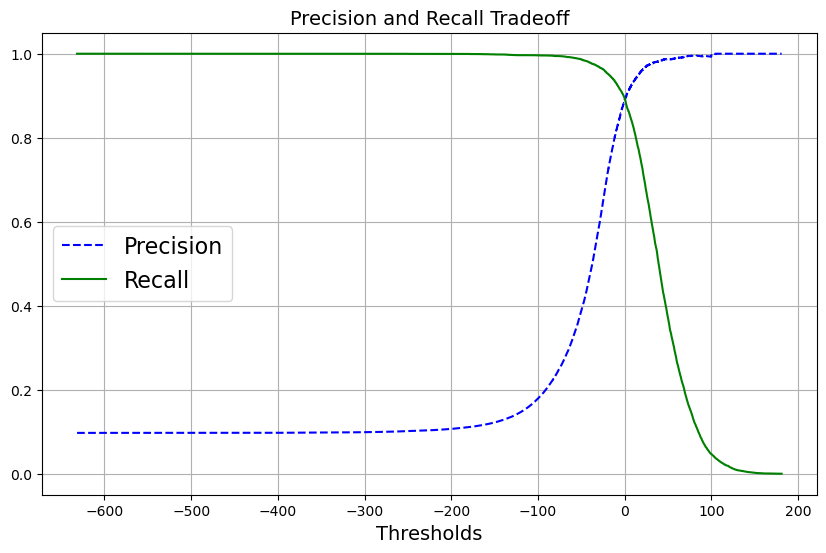

In [22]:
# Precision and Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds_vals, precision_vals[:-1], 'b--', label='Precision')
plt.plot(thresholds_vals, recall_vals[:-1], 'g-', label='Recall')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Thresholds', fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [23]:
## Try to change threshold from 0 to any number --> 
## more than 0 --> precision increases and recall decreases
## less than 0 --> precision decreases and recall increases

## Increase threshold to be more than 0
precision_score_50 = precision_score(y_train_4, y_scores_sgd>50)
recall_score_50 = recall_score(y_train_4, y_scores_sgd>50)
print('Precison Score using SGD at threshold=50 ---- ', precision_score_50)
print('Recall Score using SGD at threshold=50 ---- ', recall_score_50)

print('---'*30)

## Decrease threshold to be less than 0
precision_score_50_minus = precision_score(y_train_4, y_scores_sgd>-50)
recall_score_50_minus = recall_score(y_train_4, y_scores_sgd>-50)
print('Precison Score using SGD at threshold=-50 ---- ', precision_score_50_minus)
print('Recall Score using SGD at threshold=-50 ---- ', recall_score_50_minus)

Precison Score using SGD at threshold=50 ----  0.9872146118721461
Recall Score using SGD at threshold=50 ----  0.3700787401574803
------------------------------------------------------------------------------------------
Precison Score using SGD at threshold=-50 ----  0.389069044723686
Recall Score using SGD at threshold=-50 ----  0.9857925368024649


In [24]:
## What about choosing precision to be specific value --> Let's say, We want precision to be more than 90%
## OK
threshold_prec_90 = thresholds_vals[np.argmax(precision_vals >= 0.90)]   ## Threshold which achieve precision >= 90%
print(f'Threshold which achieve Precision >= 90% ---- {threshold_prec_90:.4f}')

## Prediction at specific threshold which achieve precision >= 90%
y_pred_prec_90 = (y_scores_sgd >= threshold_prec_90)
print(f'Precison Score using SGD at threshold={threshold_prec_90:.3f} ---- {precision_score(y_train_4, y_pred_prec_90):.3f}')
print(f'Recall Score using SGD at threshold={threshold_prec_90:.3f} ---- {recall_score(y_train_4, y_pred_prec_90):.3f}')

Threshold which achieve Precision >= 90% ---- 1.9444
Precison Score using SGD at threshold=1.944 ---- 0.900
Recall Score using SGD at threshold=1.944 ---- 0.878


## Precision & Recall Curve

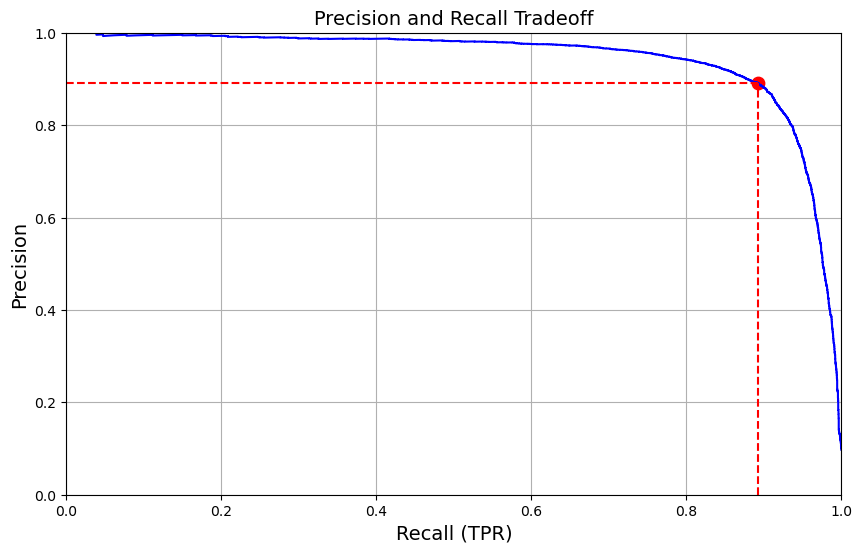

In [25]:
## Precision and Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, 'b-')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Recall (TPR)', fontsize=14)
plt.ylabel('Precision', fontsize=14)
## plotting the point at threshold=0 -- whis is our case here
plt.scatter(recall_score_sgd, precison_score_sgd, color='r', marker='o', s=80)
plt.vlines(ymin=0, ymax=precison_score_sgd, x=recall_score_sgd, linestyles='--', color='r')
plt.hlines(xmin=0, xmax=recall_score_sgd, y=precison_score_sgd, linestyles='--', color='r')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## ROC Curve
#### Receiver Operating Characteristic (ROC)



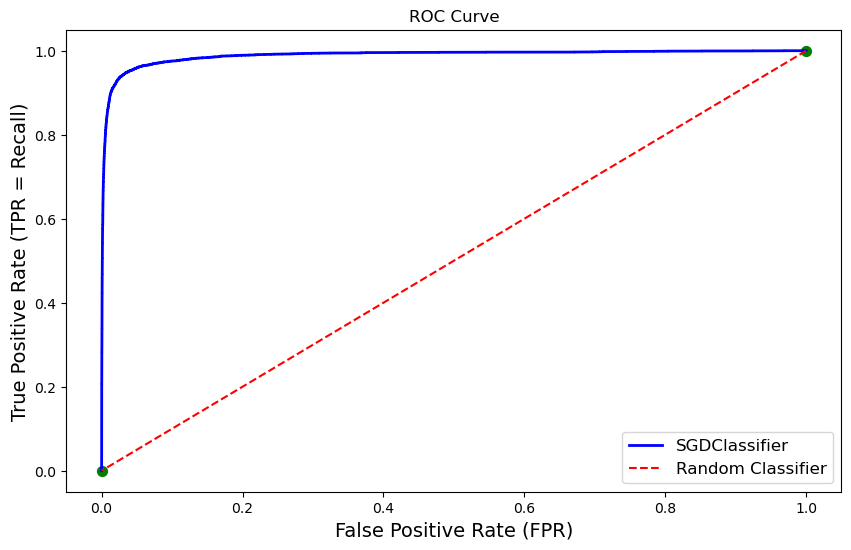

In [26]:
## ROC Curve --> Binary Classification only
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_4, y_scores_sgd)


## Plotting
plt.figure(figsize=(10, 6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, color='b', label='SGDClassifier')
plt.plot([1, 0], [1, 0], 'r--', label='Random Classifier')
plt.scatter(0, 0, color='g', s=50)
plt.scatter(1, 1, color='g', s=50)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR = Recall)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [27]:
## To get the AUC (Area under Curve) 
auc_sgd = roc_auc_score(y_train_4, y_scores_sgd)
print('Area Under Curve using SGD -- ', auc_sgd)

Area Under Curve using SGD --  0.9888075337254499
